In [40]:
from Network import FeedForwardNetwork
from NN_deri_Lorenz import train_lorenz, obtain_lorenz_data
from NN_deri_two_compart import train_twocompart, obtain_twocompart_data
from NN_deri_nonlinear import train_nonlinear,obtain_nonlinear_data
from scipy.integrate import odeint
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas
from Gaussian_process_der import GP_derivative, GP, rbf, rbf_fd
from lorenz import create_data_lorenz
from non_linear import create_data_nonlinear
from two_compartment import create_data_twocompart
from Derivative_Data_Lorenz import obtain_train_data_Lorenz
from Derivative_Data_NonLinear import obtain_train_data_NonLinear
from Derivative_Data_Two_Compart import obtain_train_data_Two_compart
import derivative
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [41]:

def true_derivative_nonlinear():
    T, Y = create_data_nonlinear(p=0.)
    result_1=[]
    result_2=[]
    for i in range(len(T)):
        u = Y[i,0]
        v = Y[i,1]
        result_1.append(-0.1*u**3 + 2*v**3)
        result_2.append(-2*u**3 - 0.1*v**3)
    return np.array(result_1), np.array(result_2)

def true_derivative_lorenz():
    T, Y = create_data_lorenz(p=0.)
    result_1=[]
    result_2=[]
    result_3=[]
    for i in range(len(T)):
        x = Y[i,0]
        y = Y[i,1]
        z = Y[i,2]
        result_1.append(-10*x + 10*y)
        result_2.append(28*x-y-x*z)
        result_3.append((-8/3)*z+x*y)
    return np.array(result_1), np.array(result_2),np.array(result_3)

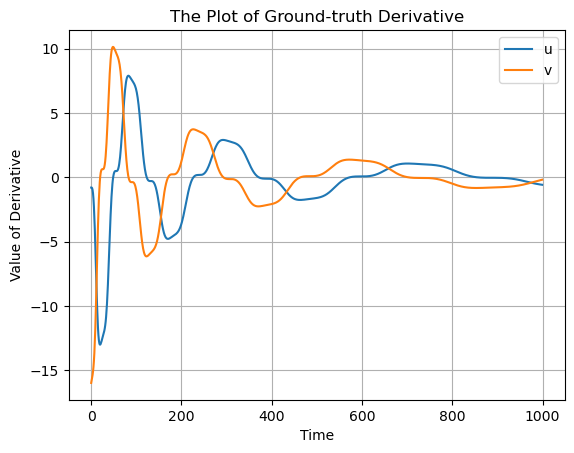

In [42]:
y_1_train, y_2_train =true_derivative_nonlinear()
plt.plot(y_1_train,label= "u")
plt.plot(y_2_train,label= "v")
plt.title('The Plot of Ground-truth Derivative')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

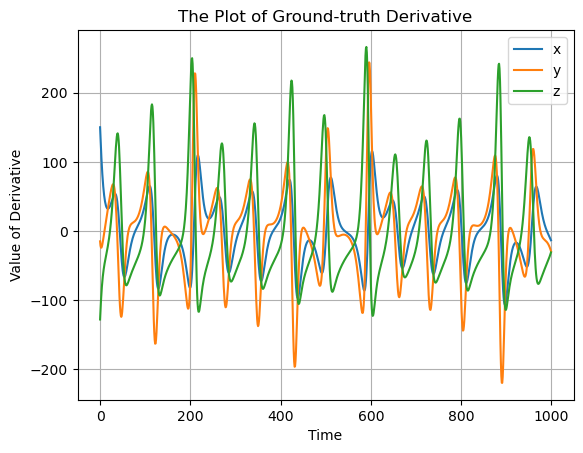

In [43]:
y_1_train, y_2_train,y_3_train =true_derivative_lorenz()
plt.plot(y_1_train,label= "x")
plt.plot(y_2_train,label= "y")
plt.plot(y_3_train,label= "z")
plt.title('The Plot of Ground-truth Derivative')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

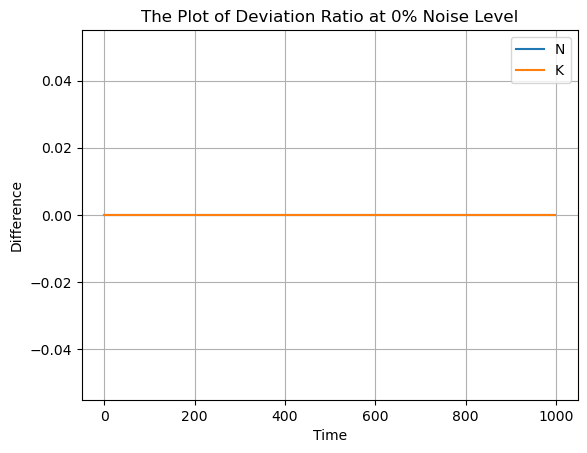

In [44]:
T, Y = create_data_twocompart(p=0.00)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

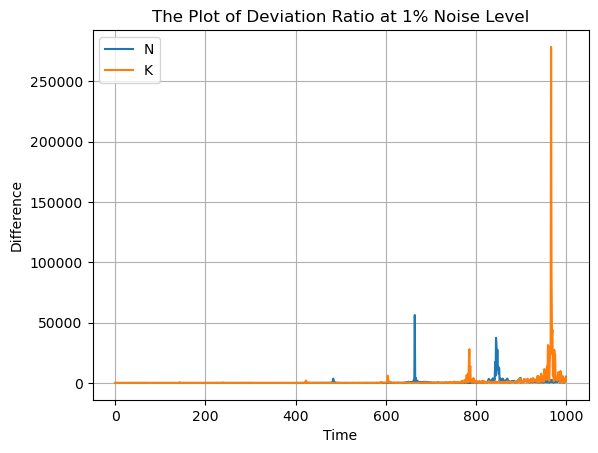

In [45]:
T, Y = create_data_twocompart(p=0.01)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

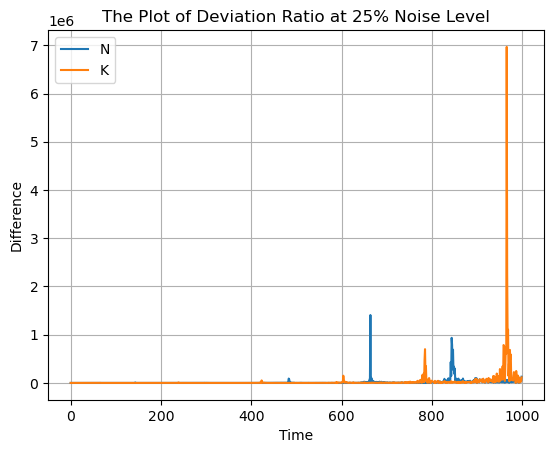

In [46]:
T, Y = create_data_twocompart(p=0.25)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

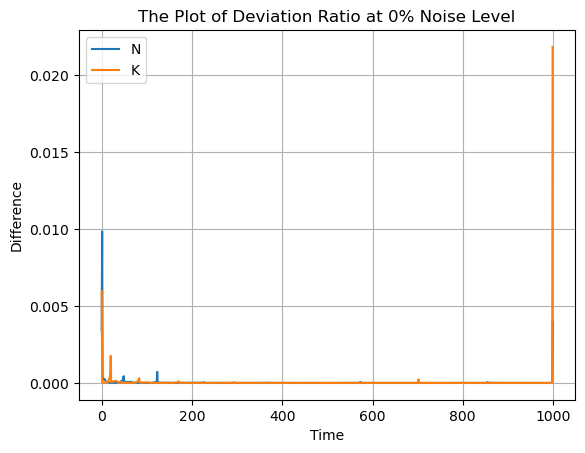

In [47]:
T, Y = create_data_nonlinear(p=0.00)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

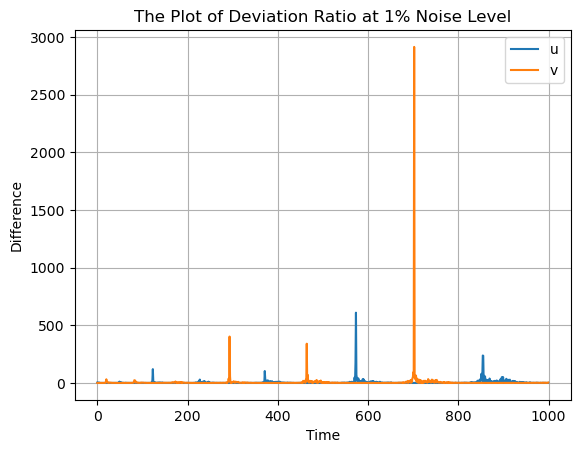

In [48]:
T, Y = create_data_nonlinear(p=0.01)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "u")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

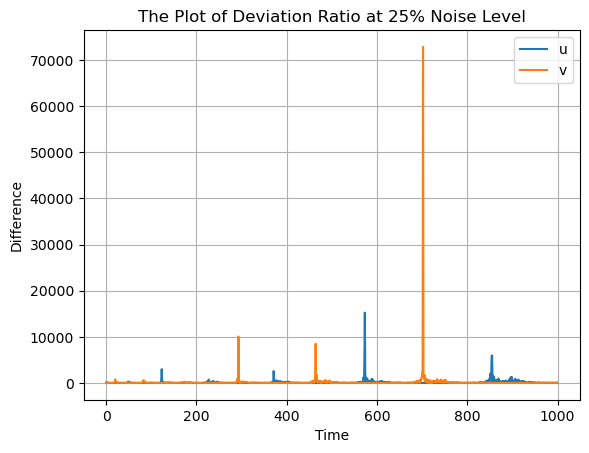

In [49]:
T, Y = create_data_nonlinear(p=0.25)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "u")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "v")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

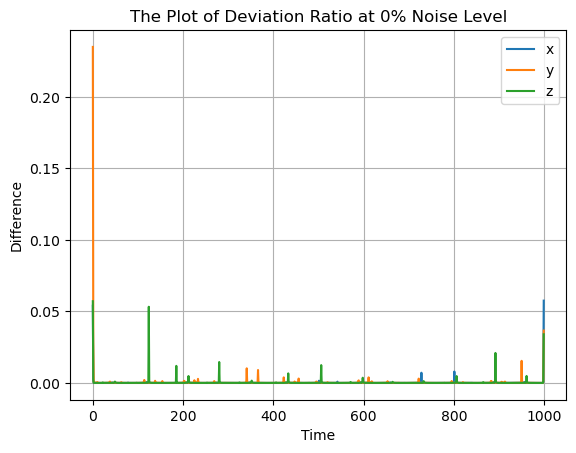

In [50]:
T, Y = create_data_lorenz(p=0.00)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(Y[:,2], T, kind="finite_difference", k=2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

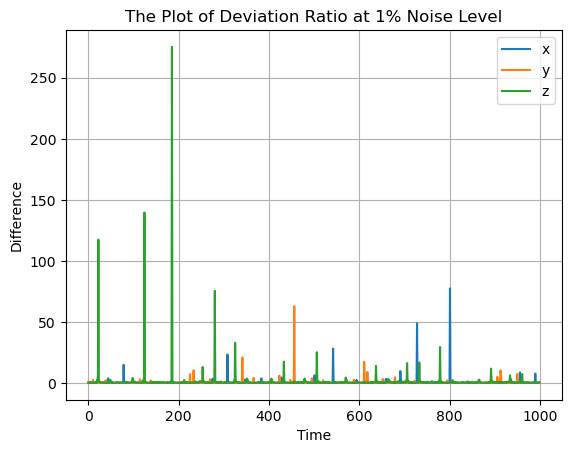

In [51]:
T, Y = create_data_lorenz(p=0.01)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(Y[:,2], T, kind="finite_difference", k=2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

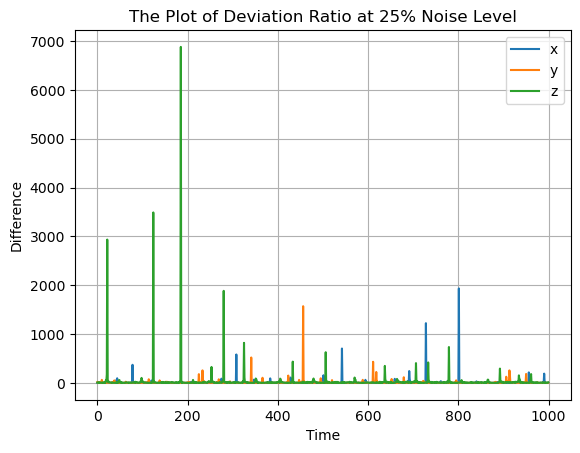

In [52]:
T, Y = create_data_lorenz(p=0.25)

result_1 = derivative.dxdt(Y[:,0], T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(Y[:,1], T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(Y[:,2], T, kind="finite_difference", k=2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

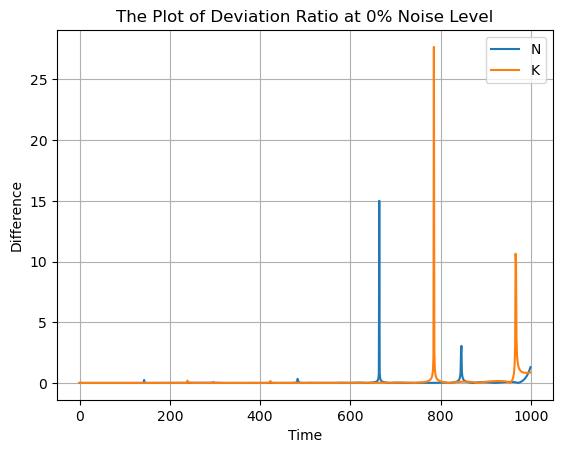

In [53]:
T, Y = create_data_twocompart(p=0.00)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

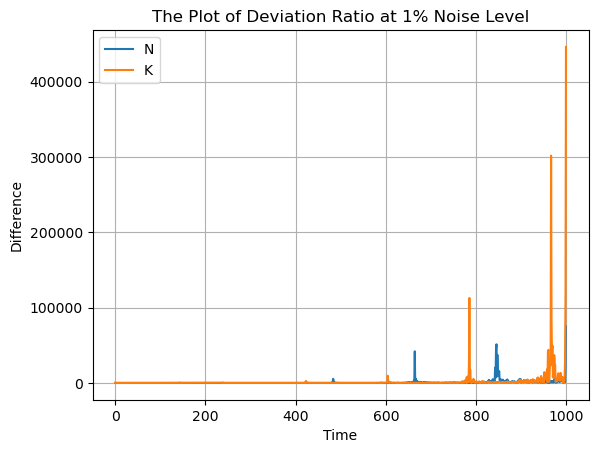

In [54]:
T, Y = create_data_twocompart(p=0.01)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

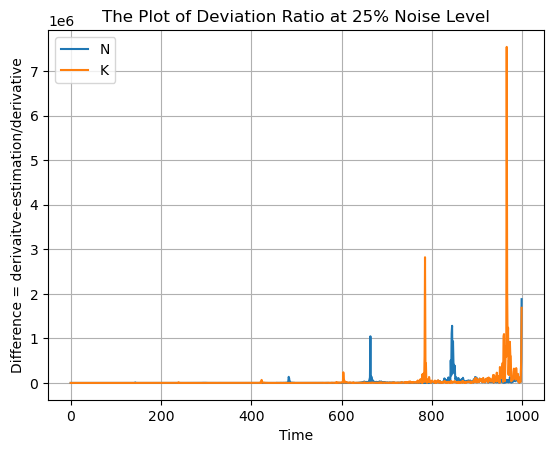

In [62]:
T, Y = create_data_twocompart(p=0.25)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|')
plt.legend()
plt.grid()

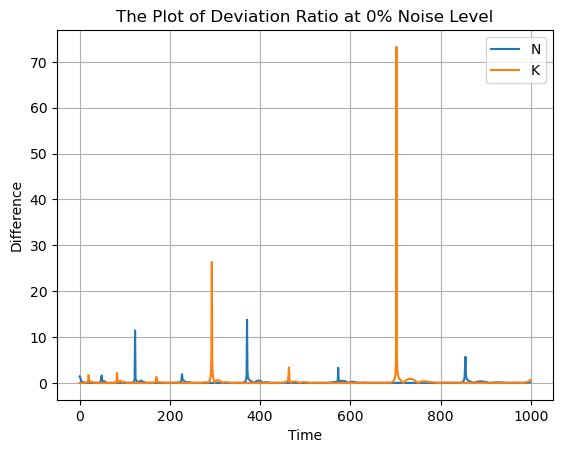

In [56]:
T, Y = create_data_nonlinear(p=0.00)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "N")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

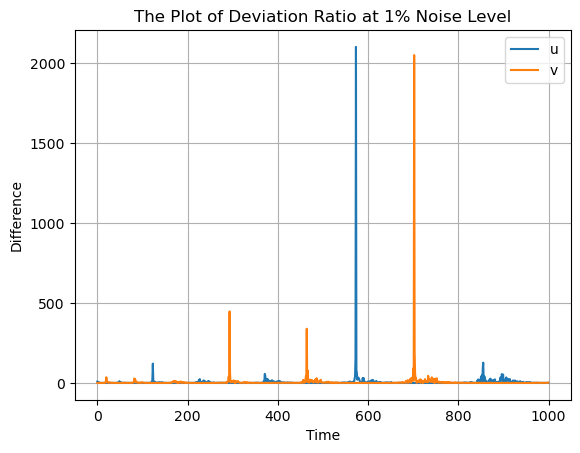

In [57]:
T, Y = create_data_nonlinear(p=0.01)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "u")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

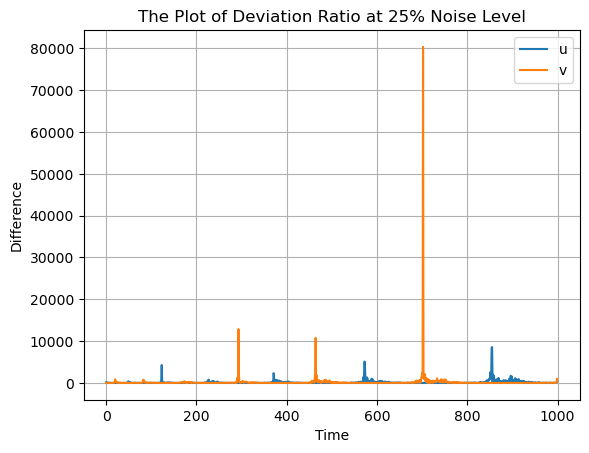

In [58]:
T, Y = create_data_nonlinear(p=0.25)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_1_T,result_2_T = true_derivative_nonlinear()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "u")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "v")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

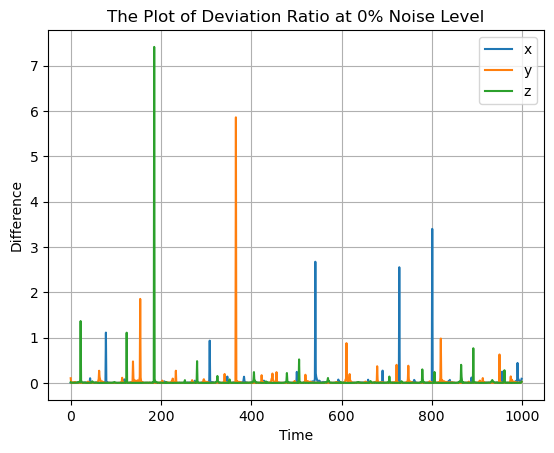

In [59]:
T, Y = create_data_lorenz(p=0.00)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_3 = derivative.dxdt(Y[:,2], T, kind="spline", s=1.e-2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

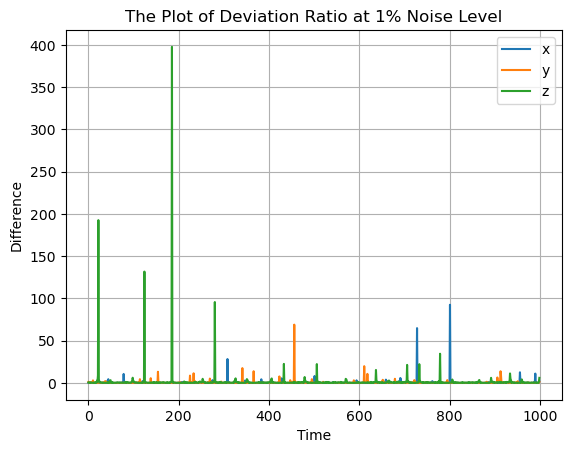

In [60]:
T, Y = create_data_lorenz(p=0.01)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_3 = derivative.dxdt(Y[:,2], T, kind="spline", s=1.e-2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()

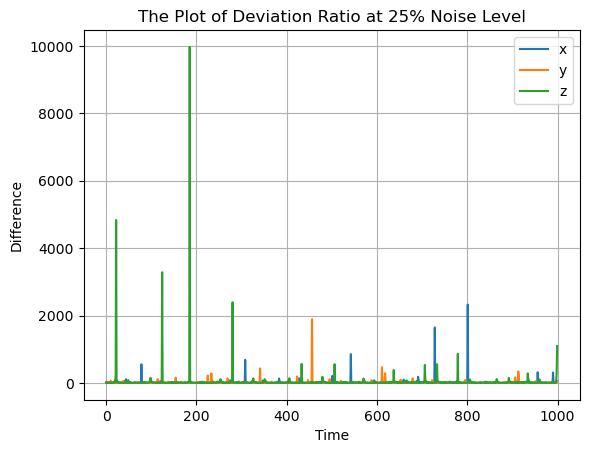

In [61]:
T, Y = create_data_lorenz(p=0.25)

result_1 = derivative.dxdt(Y[:,0], T, kind="spline", s=1.e-2)
result_2 = derivative.dxdt(Y[:,1], T, kind="spline", s=1.e-2)
result_3 = derivative.dxdt(Y[:,2], T, kind="spline", s=1.e-2)
result_1_T,result_2_T,result_3_T = true_derivative_lorenz()

plt.plot(np.abs(result_1-result_1_T)/(np.abs(result_1_T)),label= "x")
plt.plot(np.abs(result_2-result_2_T)/(np.abs(result_2_T)),label= "y")
plt.plot(np.abs(result_3-result_3_T)/(np.abs(result_3_T)),label= "z")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.grid()